In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import glob
%matplotlib inline

# 冷却温度分布のシミュレーション

In [99]:
size = 100
temp_all = np.zeros((size*size, 20000))
temp_all[:,0]  = (np.ones((size, size)) * 310).flatten()
delta_t = 0.001 #1ms
alpha = 0.0000001466 #水の熱拡散係数
rho_c = 4200000
cell_height = 0.00015

In [100]:
h = 290 #W/(m^2 K)
target_temp = np.ones((size, size)) * 310
target_temp[size/2-2:size/2+2, size/2-1:] = 304
target_temp = target_temp.flatten()

In [101]:
small_mat = np.identity(size)*(-4)+np.tri(size,size,-1)-np.tri(size,size,-2)-np.tri(size,size,0)+np.tri(size,size,1)
def_mat = np.zeros((size*size, size*size))
for i in range(size):
    for j in range(size):
        if i == j:
            def_mat[size*i:size*(i+1), size*j:size*(j+1)] = small_mat
        if i-j == 1 or i-j == -1:
            def_mat[size*i:size*(i+1), size*j:size*(j+1)] = np.identity(size)

In [98]:
plt.imshow((target_temp).reshape((size, size)), cmap='jet')
plt.colorbar()
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171028/temp.png', dpi=300, transparent=True)
plt.close()

In [102]:
num = 0
while num < 20000:
    if num % 1000 == 0:
        print(num)
    temp = temp_all[:, num] + alpha/delta_t*np.dot(def_mat, temp_all[:, num])+delta_t/rho_c/cell_height*h*(target_temp-temp_all[:, num])
    temp = temp.reshape((size, size))
    temp[0,:] = 310
    temp[-1,:] = 310
    temp[:,0] = 310
    temp[:, -1] = 310
    temp_all[:, num+1] = temp.flatten()
    num += 1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


IndexError: index 20000 is out of bounds for axis 1 with size 20000

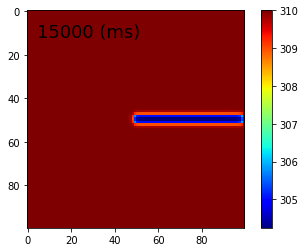

In [83]:
time = 15000
plt.imshow(temp_all[:, time].reshape((size, size)), vmin=np.min(temp_all), vmax=np.max(temp_all), cmap='jet')
plt.text(4,12,"%s (ms)" % "{0:05d}".format(time),fontsize=18)
plt.colorbar()

In [103]:
output_dir = '/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171028/temp_1'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [104]:
for i in range(200):
    time = 100*i
    plt.imshow(temp_all[:, time].reshape((size, size)), vmin=np.min(temp_all), vmax=np.max(temp_all), cmap='jet')
    plt.text(4,12,"%s (ms)" % "{0:05d}".format(time),fontsize=18)
    plt.colorbar()
    plt.savefig(os.path.join(output_dir, '%s.png'%'{0:04d}'.format(i)), dpi=300, transparent=True)
    plt.close()

In [105]:
subprocess.call('ffmpeg -r 30 -y -i "{0}/%04d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/movie.mp4"'.format(output_dir), shell=True)

0